In [1]:
learnMSA_path = "../../learnMSA" #ignore if learnMSA is already installed via pip/conda

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
col_names = ["dataset", "family", "num_seq", "num_ref_seq", "avg_len", "avg_ref_len", "sim", "SP", 
            "modeler", "TC", "column", "s", "h:m:s", "max_rss", "max_vms", "max_uss", 
            "max_pss", "io_in", "io_out", "mean_load", "cpu_time"]

In [3]:
tools = ["learnMSA",  "learnMSA2", "../../results/t_coffee", "../../results/famsa"]

In [4]:
dfs = []
for tool in tools:
    df = pd.read_csv(f"results_2.0.9/{tool}.out", index_col=False, sep=' ', names=col_names)
    df["tool"] = tool
    df = df.set_index(df.dataset + "_" + df.family)
    #df = df.drop(df.index[df.dataset != "homfam"])
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)

In [18]:
merged_df.loc[merged_df['family'] == "peroxidase"].loc[merged_df["dataset"] == "homfam"]

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,tool
35,homfam,peroxidase,4514,5,256.626,383,37.3,61.3,69.2,36.1,...,0:07:02,7868.59,122749.37,7858.37,7860.74,359.97,17.37,353.56,1505.65,learnMSA
129,homfam,peroxidase,4514,5,256.626,383,37.3,78.5,83.4,46.4,...,0:09:19,9045.66,122822.76,9036.31,9038.63,2215.83,13.40,320.67,1814.46,learnMSA2
554,homfam,peroxidase,4514,5,256.626,383,37.3,67.4,71.1,33.2,...,0:02:05,176.99,7007.90,143.07,146.74,0.00,0.21,755.47,969.83,../../results/t_coffee
1135,homfam,peroxidase,4514,5,256.626,383,37.3,81.6,83.8,53.6,...,0:00:01,213.15,7017.47,185.36,188.90,0.00,0.02,0.00,14.87,../../results/famsa


In [12]:
def summarize(df, data):
    print(df.loc[df.dataset==data][["SP", "modeler", "TC", "column", "s"]].mean())

df_prev = None
for tool, df in zip(tools, dfs):
    print(tool)
    summarize(df, "homfam")
    # if df_prev is not None:
    #     print("Difference")
    #     print(df[["SP", "modeler", "TC", "column", "s"]].mean() - df_prev[["SP", "modeler", "TC", "column", "s"]].mean())
    df_prev = df

learnMSA
SP          85.476596
modeler     86.775532
TC          63.706383
column      69.575532
s          326.257141
dtype: float64
learnMSA2
SP          87.614894
modeler     88.009574
TC          66.455319
column      73.197872
s          460.144339
dtype: float64
../../results/t_coffee
SP          81.421277
modeler     83.261702
TC          56.567021
column      61.494681
s          155.937053
dtype: float64
../../results/famsa
SP         84.313830
modeler    84.421277
TC         60.071277
column     64.895745
s           2.158230
dtype: float64


In [9]:
df_new = dfs[tools.index("learnMSA2")]
df_old = dfs[tools.index("../../results/learnMSA_language2")]

In [10]:
df_new["diff_SP"] = df_new["SP"] - df_old["SP"]

In [11]:
df_new.sort_values(by="diff_SP")

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,tool,diff_SP
homfam_phc,homfam,phc,2957,12,98.4711,179,37.2,70.8,88.3,32.4,...,8881.64,122997.86,8545.23,8627.75,1.99,7.84,137.64,403.35,learnMSA2,-22.7
ext_homfam_huge_bac_luciferase,ext_homfam_huge,bac_luciferase,261894,4,278.5750,336,30.1,57.8,68.8,41.7,...,24647.52,131803.66,24311.01,24399.49,37.87,875.38,197.19,15752.06,learnMSA2,-18.9
ext_homfam_huge_kinase,ext_homfam_huge,kinase,949994,15,222.7750,488,25.9,60.4,83.8,0.0,...,46250.29,153465.72,45594.84,45678.75,1.46,11789.71,809.79,175298.17,learnMSA2,-17.4
ext_homfam_huge_molybdopterin,ext_homfam_huge,molybdopterin,347815,4,254.3320,836,39.3,24.8,54.6,0.0,...,43168.00,149230.98,42810.12,42898.54,65.82,3325.30,923.69,186906.12,learnMSA2,-16.0
homfam_seatoxin,homfam,seatoxin,93,5,43.6344,54,42.6,64.8,62.6,6.1,...,6053.41,122710.38,5789.43,5917.89,1.99,4.26,137.39,251.68,learnMSA2,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ext_homfam_huge_Cyclodex_gly_tran,ext_homfam_huge,Cyclodex_gly_tran,313216,6,182.5830,707,63.0,85.1,90.4,66.0,...,31015.33,137317.68,30678.75,30779.79,1.74,1945.25,553.27,59056.06,learnMSA2,8.3
ext_homfam_huge_igC1,ext_homfam_huge,igC1,257516,5,76.9806,102,43.5,76.8,78.8,53.9,...,12679.66,123043.34,12343.35,12432.75,1.71,373.48,340.19,6027.11,learnMSA2,10.6
ext_homfam_huge_MHC_II_alpha_NC,ext_homfam_huge,MHC_II_alpha_NC,261656,4,76.9301,187,44.8,42.9,85.7,0.0,...,12232.21,123176.70,11895.80,11984.04,1.72,460.41,595.49,12129.46,learnMSA2,16.1
ext_homfam_huge_MHC_II_C,ext_homfam_huge,MHC_II_C,257519,8,76.9809,105,38.8,77.4,80.3,61.4,...,12288.02,122952.49,11951.23,12051.50,1.73,305.82,227.41,3836.62,learnMSA2,16.3


In [14]:
import matplotlib.patheffects as pe
pd.options.mode.chained_assignment = None

def make_barplots(datasets, merged_df, means, 
                  score1 = "SP", score2 = "TC", 
                  tools_drop_from_small_plots=[], name="barplots",
                  wspace=0.2, font_size=12):

    sns.set_style("whitegrid")

    fig, axes = plt.subplot_mosaic([datasets[:1]*(len(datasets)-1), datasets[1:]], 
                                   figsize=((len(datasets)-1)*max(4, len(means.tool.unique())-1)*0.8, 7),
                                   gridspec_kw={"height_ratios":[1.5,1]})
    fig.subplots_adjust(wspace=wspace, hspace=0.6)

    def map_tool_names(data):
        data.tool = data.tool.astype('category')
        data.tool = data.tool.cat.rename_categories(tool_name_map)
        data.tool = data.tool.astype('object')

    #get the permutation that sorts the tools by their mean TC score
    sorted_ds_tools = means.groupby(["dataset", "tool"])["TC"].mean().sort_values(ascending=False).index
    means_sorted = means.set_index(["dataset", "tool"]).loc[sorted_ds_tools].reset_index()


    def get_tool_colors(palette_name):
        base_order = list(means_sorted.tool.unique())
        palette = sns.color_palette(palette_name, len(base_order))
        return {tool_name_map[t] : palette[i] for i,t in enumerate(base_order)}


    for i,d in enumerate(datasets):

        ax = axes[d]

        data = merged_df[merged_df.dataset == d]
        order = means_sorted[means_sorted.dataset == d]
        
        if i > 0:
            for t in tools_drop_from_small_plots:
                data = data.drop(data[data.tool == t].index)
                order = order.drop(order[order.tool == t].index)
 
        min_tc = order[score2].min()
        max_sp = order[score1].max()

        #runtimes as lables before relabeling
        for t in data.tool.unique():
            seconds = means[np.logical_and(means.dataset == d, means.tool == t)].s.to_numpy()[0]
            hours = seconds / 60 / 60
            label = f"{np.round(hours, 2)} h"
            ax.text(tool_name_map[t], min_tc+(max_sp-min_tc)/2, label, ha='center', 
                    color="black", size=0.9*font_size if i==0 else 0.7*font_size,
                    path_effects=[pe.withStroke(linewidth=3, foreground="white")])

        #rename labels more appropriately
        map_tool_names(data)
        map_tool_names(order)
        order = list(order.tool)

        tool_colors = get_tool_colors("deep")

        #render sp scores 
        bar1 = sns.barplot(
            data=data, x="tool", y=score1, hue="tool", order=order,
            err_kws={"color": ".4", "linewidth": 1.5}, capsize=.2,
            linewidth=1, edgecolor=".6", 
            palette=tool_colors, alpha=.5, ax=ax)

        #render tc scores as stacked bars on top
        bar3 = sns.barplot(data=data, x="tool", y=score2, hue="tool", order=order, 
            errorbar=None,               
            palette=get_tool_colors("dark"), alpha=.5, ax=ax)

        ax.set_xlabel("")
        ax.set_ylim(min_tc, ax.get_ylim()[1]-3)
        for item in ax.get_xticklabels():
            item.set_rotation(20)
            item.set_size(font_size if i==0 else 0.8*font_size)
        if i > 1:
            ax.set_ylabel("")
        else:
           ax.set_ylabel(f"{score1} (fade)\n{score2} (solid)", rotation=90, size=font_size)
        #save as pdf
        #plt.savefig(f"plots/{name}.pdf", format="pdf", bbox_inches="tight")
        #plt.savefig(f"plots/{name}.png", format="png", bbox_inches="tight")
    return tool_colors

{'2_no_anc_a': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 '2': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 '2_b': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 '2_no_anc_b': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 '1.3': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 '1.3_no_anc_a': (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 '1.2_no_anc_b': (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 '1.3_viterbi_surgery': (0.5490196078431373,
  0.5490196078431373,
  0.5490196078431373),
 '1.3_no_anc_b': (0.8, 0.7254901960784313, 0.4549019607843137),
 '1.2_b': (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 '1.3_b': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 '1.2': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 '1.2_no_anc_a': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 '1.0': (0.7686274509803922, 0

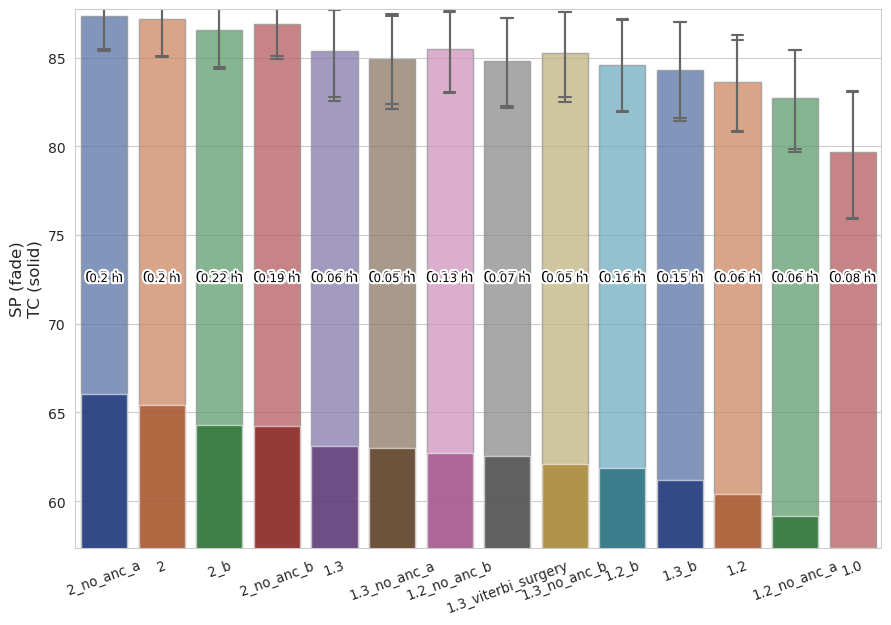

In [15]:
make_barplots(["homfam", "homfam"], merged_df, means)

In [ ]:
tools = ["learnMSA_1_0", 
        "learnMSA_1_2", "learnMSA_1_2_b", 
        "learnMSA_1_2_no_anc_a", "learnMSA_1_2_no_anc_b",
         "learnMSA_1_3", "learnMSA_1_3_b", "learnMSA_1_3_no_anc_a", "learnMSA_1_3_no_anc_b", 
         "learnMSA_1_3_viterbi_surgery",
         "learnMSA_2", "learnMSA_2_b", "learnMSA_2_no_anc_a", "learnMSA_2_no_anc_b"]

In [22]:
df_anc

,dataset,family,num_seq,num_ref_seq,avg_len,avg_ref_len,sim,SP,modeler,TC,...,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,tool,diff_TC
homfam_ricin,homfam,ricin,747,7,198.7080,281,37.5,87.1,87.6,69.2,...,4486.92,93209.17,4311.34,4353.92,0.00,0.54,151.02,294.20,learnMSA_1_2_b,-0.4
homfam_ghf10,homfam,ghf10,1502,5,220.3400,364,43.3,93.3,93.5,80.2,...,4547.95,95811.31,4371.50,4429.08,0.00,0.66,211.01,1070.66,learnMSA_1_2_b,0.6
homfam_seatoxin,homfam,seatoxin,93,5,43.6344,54,42.6,73.6,71.9,34.7,...,4037.54,92790.55,3862.20,3904.72,0.00,0.54,126.08,152.03,learnMSA_1_2_b,16.3
homfam_mofe,homfam,mofe,2567,6,353.0740,609,30.0,82.6,84.0,62.5,...,5300.02,96573.18,5125.54,5185.49,0.00,0.67,238.82,1952.28,learnMSA_1_2_b,-4.1
homfam_cyt3,homfam,cyt3,385,6,92.3065,130,40.3,33.7,32.1,0.0,...,4121.75,92766.25,3946.52,3988.92,0.00,0.53,110.38,147.44,learnMSA_1_2_b,-45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
homfam_trfl,homfam,trfl,837,7,242.3150,702,61.9,93.9,94.4,87.0,...,4907.48,94055.72,4732.75,4778.65,0.00,0.66,217.10,1186.27,learnMSA_1_2_b,-3.4
homfam_TNF,homfam,TNF,556,5,119.9030,176,32.0,81.1,82.1,65.0,...,4275.51,92944.77,4100.11,4184.15,0.00,0.27,154.38,229.61,learnMSA_1_2_b,7.7
homfam_scorptoxin,homfam,scorptoxin,363,8,53.2562,74,46.3,90.0,89.4,68.5,...,4112.11,92862.72,3937.39,3979.77,0.00,0.52,93.63,101.78,learnMSA_1_2_b,-4.1
homfam_aldosered,homfam,aldosered,13277,7,268.5470,386,41.6,85.7,90.4,66.5,...,4782.81,96033.37,4772.52,4775.64,0.00,0.36,266.18,3933.85,learnMSA_1_2_b,-4.0


In [48]:
!tail outputs/learnMSA_1_2/alignments/homfam/gluts
!tail outputs/learnMSA_1_2/scores/homfam/gluts

>1guha
.....aekpklhyfnargrmestrwllaaagvefeekfiksa.......edldklrndgylmfqqvpmveidgmklvqtrailnyiaskyn.................................lyg...kdikera...........................LIDM...........YIE.......GI..AD.....L.........GEMI......L..L-.........LPvc...PPEE.......KD.....AKLAL.....IK....EK..IKn........RYFPA.F.EKV.L......Ksh.............G......QD................................YLV.......G.....N...KLSRADIHL..VELLYYV....E...-.......-.......ELD...................-SS.....L............ISS...FPLLKALKTRISNLPtvkkflqpgsprkppmdeksleearkifrf.
>1guka
........pklyyfngrgrmesirwllaaagvefeeefletr.......eqyekmqkdghllfgqvplveidgmmltqtrailsylaakyn.................................lyg...kdlkerv...........................RIDM...........YAD.......GT..QD.....L.........MMMI......A..VAp........FK.....TPKE.......KE.....ESYDL.....IL....SRa.KT.........RYFPV.F.EKI.L......Kdh.............G......EA................................FLV.......G.....N...QLSWADIQL..LEAILMV....E...-.......-.......ELS...................-AP.....V...

In [49]:
!tail outputs/learnMSA_1_2_b/alignments/homfam/gluts
!tail outputs/learnMSA_1_2_b/scores/homfam/gluts

>1guha
.....................................................................................................................................A..-...............-.....-------.......EKPKLHYFNARGRM..................ES.........TRWl....LAAAGVEFEEK...FIKSAEDLDKL.R...........N............D......-G................................YLM.......F.....Q...QVPMVEIDG.MKLVQTR..........AIL-..................................N.......-YI...........A......SKYNLYGKDIKERALIDmyieg....................I-----------ADLGEMILLLPVCPPEE..KDAKLALIKEKiKNRYFPAFEKVLKshGQDYLVGNKLSRADIHLVELLYYVEEL-D-SSLi.SSFPLLKALKTRISNLP........tvkkflqpgsprkppmdeksleearkifrf.
>1guka
.....................................................................................................................................-..-...............-.....-------.......--PKLYYFNGRGRM..................ES.........IRWl....LAAAGVEFEEE...FLETREQYEKM.Q...........K............D......GH................................LLF.......G.....Q...-VPLVEIDG.MMLTQTR..........AIL